<a href="https://colab.research.google.com/github/ummerubaiyat/100-Days-Of-ML-Code/blob/master/Week_1_Final_Assessement_todo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning: Regression and Classification

## Week 1 - Exercise / Assessment

As you can recall, in week 1 of the supervised machine learning: Regression and Classification course, you learned about univariate linear regression (one variable linear regression). This included key concepts such as the linear regression hypothesis function, cost function, and gradient descent algorithm. 

This exercise focuses on testing your application skills of linear regression to real-world research problem. 

## Problem 

You are going to implement a univariate linear regression to estimate the cooling load and heating load of residential buildings.

The dataset you're going to use comprises 768 samples and 8 features (independent variables). The features are relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution. The two output variables (dependent variables) are heating load (HL) and cooling load (CL), of residential buildings.

You can download the dataset from [here](http://archive.ics.uci.edu/ml/datasets/energy+efficiency)
**Note:** _Click the **Data Folder** and then **ENB2012_data.xlsx** to download the dataset from the link above_

Using a simple linear regression model, we can predict the heating and
cooling loads for each of the aferomentioned features of a building. 

This dataset and work is based on a scientific article which provides
some analysis on this data set: Feel free to read more about the study - [A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567,2012](https://www.sciencedirect.com/science/article/pii/S037877881200151X?casa_token=izQv4x7bLl4AAAAA:jg0jkGXmw5B-UHPLVbi4x_RQf6b8sAgVTD9TpcvFJ1AjdJ7E46bNKST3Nay4KuB9DPM9aeN4we4)

For this problem, several tasks have been defined to be completed. 

Some of the functions of the Task have already been implemented while some are left for you to implement. 

**##TODO** Tag is used to indicate the functions or sections that you must implement.

**##Completed** Tag is used to indicate the functions that have already been completed.

## Import Libraries

In [1]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00


In [5]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 KB 12.5 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import ipywidgets as widgets

import warnings
warnings.filterwarnings("ignore")

%matplotlib widget

In case you face the error _‘ModuleNotFoundError: No module named ‘ipympl’_ , Read the article https://paddyharrison.medium.com/matplotlib-display-problems-in-jupyter-dfd0bb189d2b

## Task 1: Read  Dataset into Notebook

Instructions: Write a function that reads the *ENB2012_data.xlsx* dataset into jupyter notebook

Check this [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to learn how to read file using pandas 

Note: X1, X2,.....,X8 represent the independent variables in the dataset. Y1 and Y2 represent the dependent variables

In [7]:
#Imports
import pandas as pd

In [9]:
##Completed - Function to read excel file
def read_excel(file_path):
    """
    Reads an excel file into jupyter notebook as pandas dataframe
    
    Args:
        file_path(str): dataset file path
    """
    #read dataset file using pandas
    data_df = pd.read_excel(file_path) # complete this line
    
    return data_df

##TODO - replace filepath with your own dataset file path

filepath = "/content/ENB2012_data.xlsx"
data_df = read_excel(filepath)

data_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Task 2: Normalize Dataset between 0 - 1 

In [10]:
##Completed - Scale the data between 0 - 1 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(data_df)
scaled_df = pd.DataFrame(scaled_df, columns=['X1','X2','X3','X4','X5','X6','X7','X8', 'Y1', 'Y2'])
#scaled_df.head()

## Task 2: Explore and Visualize Data

### Task 2.1: Statistical Exploration of Data
* (Optinal) - Feel free to explore the dataset and gain insights using other methods and libraries

In [11]:
##Completed 
scaled_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.400463,0.534722,0.428571,0.601852,0.500000,0.500000,0.585938,0.562500,0.439396,0.368644
std,0.293826,0.299613,0.254382,0.409668,0.500326,0.372921,0.333051,0.310192,0.272046,0.256216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.312500,0.285714,0.277778,0.000000,0.250000,0.250000,0.350000,0.188258,0.127121
50%,0.361111,0.541667,0.428571,0.666667,0.500000,0.500000,0.625000,0.600000,0.348881,0.301104
75%,0.583333,0.770833,0.571429,1.000000,1.000000,0.750000,1.000000,0.800000,0.691763,0.598775
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Task 2.2: Visualize Dataset Features


In [12]:
def create_scatter(feature1, feature2):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(8,4))

        plt.scatter(x = scaled_df[feature1],
                    y = scaled_df[feature2],
                    c= np.random.rand(scaled_df.shape[0]),
                    s=20
                   )

        plt.xlabel(feature1.capitalize())
        plt.ylabel(feature2.capitalize())

        plt.title("%s vs %s"%(feature1.capitalize(), feature2.capitalize()))
        
        


interactive(children=(Dropdown(description='feature1', options=('X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'…

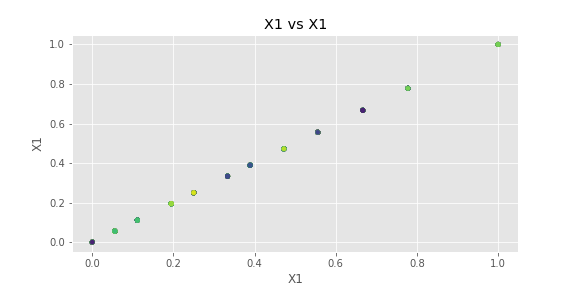

In [13]:

##TODO - Using the interactive plot, select different features and visualize their scatter plot

widgets.interact(create_scatter, feature1=scaled_df.columns, feature2=scaled_df.columns);

## Task 3: Prepare Dataset Training

In [14]:
## TODO - Assign each variable in the dataset dataframe to a new variable. 

#independent variables
x1 = scaled_df.iloc[:,0].to_numpy() #extract the first independent variable and convert to numpy()

#TODO - Complete the remaining

x2 = scaled_df.iloc[:,1].to_numpy()
x3 = scaled_df.iloc[:,2].to_numpy()
x4 = scaled_df.iloc[:,3].to_numpy()
x5 = scaled_df.iloc[:,4].to_numpy()
x6 = scaled_df.iloc[:,5].to_numpy()
x7 = scaled_df.iloc[:,6].to_numpy()
x8 = scaled_df.iloc[:,7].to_numpy()

#Dependent variables
y1 = scaled_df.iloc[:,8].to_numpy()
y2 = scaled_df.iloc[:,9].to_numpy()

## Task 4: Build Linear Regression Model

You'll implement the hypothesis, cost function and gradient descent algorithm as described in the lectures.

![image.png](attachment:image.png)

In [15]:
## TODO - Implement hypothesis
def h(x, b = 0, w = 0):
    """
    calculates the predicted values (or predicted targets) for a given set of inputs and thetas.
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    """
    
    #complete the function 
    h_p = b + w*x
    
    return h_p 

# TODO - Implement the cost Function
def compute_cost(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters 
      
    Return:
        total_cost: scalar
    """
    ##Complete Function
    m = len(y)
    y_pred = np.dot(x, w) + b
    total_cost = np.sum((y_pred - y) ** 2) / (2 * m)
    
    return total_cost

### TODO -  Implement Gradient Function

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    #complete function
    m = len(y)
    y_pred = np.dot(x, w) + b
    dj_dw = np.dot(x.T, (y_pred - y)) / m
    dj_db = np.sum(y_pred - y) / m
        
    return dj_dw, dj_db

# Completed - Gradient Descent
def gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters):
    
    b = b_init
    w = w_init
    
    diff = compute_cost(x_train, y_train, w, b)
    
    print("initial Cost: {}".format(compute_cost(x_train, y_train, w, b)))

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = compute_gradient(x_train, y_train, w , b) 
        
        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw   
        
    return w, b


#Function to predict output - Completed

def predict(x, w, b):
    """
    Predicts the output value given the input x and coefficients w and b
    """

    m = x.shape[0] #number of test samples
    
    y_preds = []
    
    for i in range(m):
        
        y_pred = w * x[i] + b
        
        y_preds.append(y_pred)
        
    return np.array(y_preds)


    

## Task 5: Train Linear Regression Model With Gradient Descent

 * For each of the independent variables (x1, x2, .... , x8)run gradient descent algorithm to find the final coefficients (w_final, b_final). 

* Run this exercise for each dependent variable y1 and y2 (cooling and heating load). 

* Print _w_final_ and _b_final_ for each of the gradient descent runs. Note: There are 16 runs of gradient descent you must perform. 

* For example: (x1,y1), (x1, y2) , (x2, y1, x2, y2) ..... (x8, y1), (x8,y2)



### Task 5.1: Split  Dataset into Training and Test set 

* Split each of the independent and dependent variables into 80% training set and 20% training set. Check this [link](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to easily split dataset

* Run gradient descent on the training samples to find the coeficients (w_final, and b_final)

* Using the w_final and b_final, compute the predicted y-values
* Use the setting below for your runs. 

##### initialize parameters
w_init = 0.1

b_init = 0.5

##### Gradient descent settings
iterations = 10000

tmp_alpha = 0.01


### Example Run: Gradient Descent for X1, Y1

In [16]:
from sklearn.model_selection import train_test_split

# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01


# using the train test split function
x1_train,x1_test, y1_train, y1_test = train_test_split(x1,y1, random_state=104,test_size = 0.25, shuffle=True)

# run gradient descent for x1, y1
w_final, b_final = gradient_descent(x1_train ,y1_train, w_init, b_init, tmp_alpha, iterations)
print(f"w_final , b_final: ({w_final:8.4f},{b_final:8.4f})")


initial Cost: 0.037831587899434145
w_final , b_final: (  0.5803,  0.2026)


In [17]:
# initialize parameters
w_init = 0.1
b_init = 0.5

# Gradient descent settings
iterations = 10000
tmp_alpha = 0.01

# import train_test_split function
from sklearn.model_selection import train_test_split

# loop over all combinations of x and y
for i, xi in enumerate(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']):
    for j, yj in enumerate(['y1', 'y2']):
        
        # get the x and y variables from the stored variables
        x = globals()[xi]
        y = globals()[yj]
        
        # split the data into training and test sets
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=104, shuffle=True)
        
        # run gradient descent on the training data
        w_final, b_final = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations)
        
        # print the results
        print(f"({xi}, {yj}): w_final = {w_final:.4f}, b_final = {b_final:.4f}")


initial Cost: 0.037831587899434145
(x1, y1): w_final = 0.5803, b_final = 0.2026
initial Cost: 0.043988195434645834
(x1, y2): w_final = 0.5567, b_final = 0.1425
initial Cost: 0.04985120260286772
(x2, y1): w_final = -0.6005, b_final = 0.7563
initial Cost: 0.05655741176603483
(x2, y2): w_final = -0.5788, b_final = 0.6752
initial Cost: 0.03995325707884356
(x3, y1): w_final = 0.4724, b_final = 0.2352
initial Cost: 0.04639589914281583
(x3, y2): w_final = 0.4202, b_final = 0.1877
initial Cost: 0.05531197462696932
(x4, y1): w_final = -0.5738, b_final = 0.7839
initial Cost: 0.06219868285774163
(x4, y2): w_final = -0.5425, b_final = 0.6953
initial Cost: 0.032603459811257646
(x5, y1): w_final = 0.4842, b_final = 0.1964
initial Cost: 0.03975575173869304
(x5, y2): w_final = 0.4618, b_final = 0.1380
initial Cost: 0.04401788561985135
(x6, y1): w_final = 0.0163, b_final = 0.4262
initial Cost: 0.050546125712518736
(x6, y2): w_final = 0.0248, b_final = 0.3525
initial Cost: 0.042572845398949274
(x7, y1):

## Task 6:  Evaluate Model - Mean Square Error

Using the test samples, and the final coefficients obtained from running gradient descent, compute the mean square error of the predicted cooling (Y1) and (Y2) loads.
![image.png](attachment:image.png)



In [18]:
## TODO - Implement evaluate_model() function which basically computes 
#the mean square error between the true output variables and predicted output variables

def evaluate_model(y_true, y_preds):
    
    """
    Args:
        y_true: true output values
        y_preds: model predicted output values
        
    Return:
        return MSE
    """
    # Complete MSE function

    # Calculate the difference between the true and predicted values
    diff = y_true - y_preds
    
    # Calculate the squared difference
    squared_diff = diff ** 2
    
    # Calculate the mean of squared differences
    MSE = squared_diff.mean()
    
    return MSE
    

### Run Cell To Test MSE function implementation

In [19]:
##Test evaluate_model() function by run
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_add(self):
        self.assertEqual(evaluate_model(np.array([2 , 2]), np.array([1.5 , 1.5])), 0.25)
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_add (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## Task 7: Answer the following Questions

* Based on the training and evaluation of each of the univariate linear regression models, identify which of the univariate variables best approximates the output Y1, and Y2. 

* Which one of the independent variables performs the worse in approximate Y1, and Y2 outputs when trained with linear regression. 



In [20]:
from sklearn.linear_model import LinearRegression

# create dictionaries to store the MSE values
mse_dict_y1 = {}
mse_dict_y2 = {}

# iterate through each variable and find its MSE for Y1 and Y2
for i, var in enumerate([x1, x2, x3, x4, x5, x6, x7, x8]):
    
    # reshape the variable to 2D array
    X = var.reshape(-1, 1)
    
    # split the data into train and test
    X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.25, random_state=104, shuffle=True)
    X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.25, random_state=104, shuffle=True)
    
    # initialize the model
    lr = LinearRegression()
    
    # fit the model
    lr.fit(X_train, y1_train)
    
    # predict the values
    y1_preds = lr.predict(X_test)
    
    # calculate the MSE for Y1
    mse_dict_y1[f"x{i+1}_y1"] = evaluate_model(y1_test, y1_preds)
    
    # fit the model for Y2
    lr.fit(X_train, y2_train)
    y2_preds = lr.predict(X_test)
    
    # calculate the MSE for Y2
    mse_dict_y2[f"x{i+1}_y2"] = evaluate_model(y2_test, y2_preds)

# print the MSE scores for all the variable combinations for Y1
print("MSE scores for Y1:")
for k, v in mse_dict_y1.items():
    print(f"{k}: {v:.4f}")
    
# print the MSE scores for all the variable combinations for Y2
print("MSE scores for Y2:")
for k, v in mse_dict_y2.items():
    print(f"{k}: {v:.4f}")

# find the variable with the lowest MSE for Y1 and Y2
best_var_y1 = min(mse_dict_y1, key=mse_dict_y1.get)
best_var_y2 = min(mse_dict_y2, key=mse_dict_y2.get)

# print the results
print(f"\nThe best variable for Y1 is {best_var_y1} with MSE of {mse_dict_y1[best_var_y1]:.4f}")
print(f"The best variable for Y2 is {best_var_y2} with MSE of {mse_dict_y2[best_var_y2]:.4f}")


MSE scores for Y1:
x1_y1: 0.0479
x2_y1: 0.0442
x3_y1: 0.0565
x4_y1: 0.0200
x5_y1: 0.0164
x6_y1: 0.0748
x7_y1: 0.0718
x8_y1: 0.0746
MSE scores for Y2:
x1_y2: 0.0393
x2_y2: 0.0359
x3_y2: 0.0503
x4_y2: 0.0164
x5_y2: 0.0133
x6_y2: 0.0642
x7_y2: 0.0627
x8_y2: 0.0641

The best variable for Y1 is x5_y1 with MSE of 0.0164
The best variable for Y2 is x5_y2 with MSE of 0.0133


In [21]:
# find the variable with the highest MSE for Y1 and Y2
worst_var_y1 = max(mse_dict_y1, key=mse_dict_y1.get)
worst_var_y2 = max(mse_dict_y2, key=mse_dict_y2.get)

# print the results
print(f"The worst variable for Y1 is {worst_var_y1} with MSE of {mse_dict_y1[worst_var_y1]:.4f}")
print(f"The worst variable for Y2 is {worst_var_y2} with MSE of {mse_dict_y2[worst_var_y2]:.4f}")


The worst variable for Y1 is x6_y1 with MSE of 0.0748
The worst variable for Y2 is x6_y2 with MSE of 0.0642
